# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.sum(np.square(X.dot(w) - y)) / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2 * np.dot(X.T, X.dot(w) - y) / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trajectory = []
    w = w_init.copy()
    for _ in range(n_iterations):
        w -= lr * loss.calc_grad(X, y, w)
        trajectory.append(w.copy())
    return trajectory

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.2625821435192
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

learning_rate = 0.0005


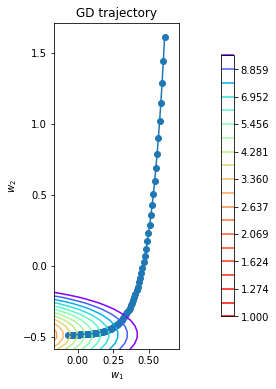

learning_rate = 0.001


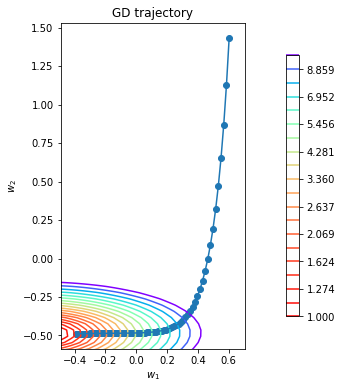

learning_rate = 0.005


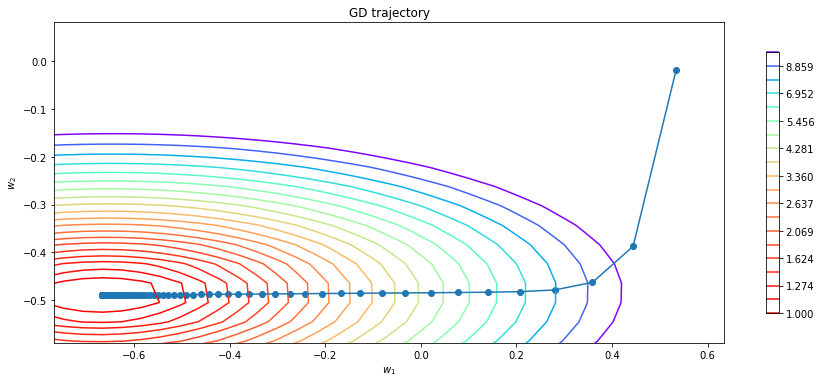

learning_rate = 0.01


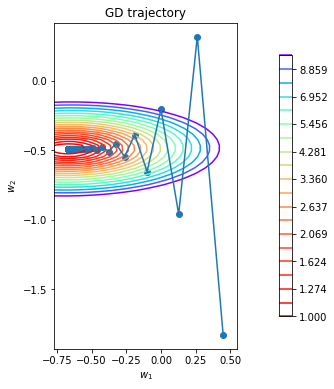

learning_rate = 0.1


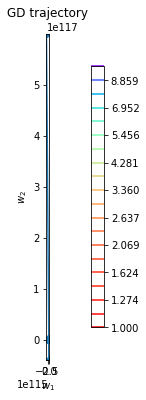

In [9]:
lrs = [0.0005, 0.001, 0.005, 0.01, 0.1]
loss = MSELoss()
for lr in lrs:
    print(f'learning_rate = {lr}')
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss)    

In [10]:
loss.calc_loss(X, y, gradient_descent(w_init, X, y, loss, 0.1, 100)[-1])

2.867494833868944e+237

На парвых 3 значениях видим замечательную картину, как небольшими шажочками сходимся к оптимуму. А при lr=0.01 мы больше учитывем градиент и траектория ставновится более зашумленной, начинаем скакать сильно. При lr=0.1 вообще картина не ясна конечно, но теоретический понятно, что это достаточно многовато, и скорее всего мы будем перескакивать оптимум, что подтверждается опытом в предыдущей ячейке , где имеем огромную ошибку

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [9]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    trajectory = []
    w = w_init.copy()
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w -= lr * loss.calc_grad(X[batch_indices], y[batch_indices], w)
        trajectory.append(w.copy())
    return trajectory

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

learning_rate = 0.0005
batch_size = 2


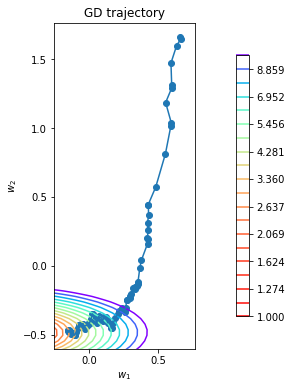

learning_rate = 0.0005
batch_size = 4


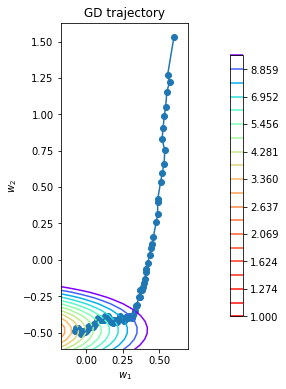

learning_rate = 0.0005
batch_size = 8


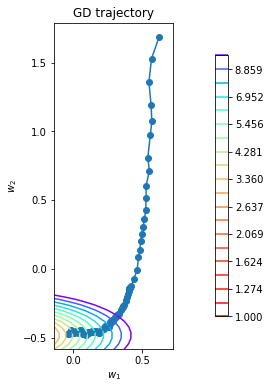

learning_rate = 0.0005
batch_size = 16


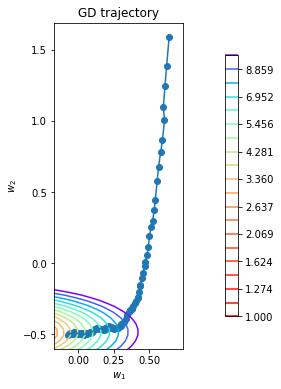

learning_rate = 0.001
batch_size = 2


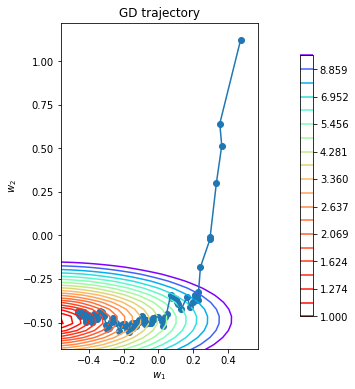

learning_rate = 0.001
batch_size = 4


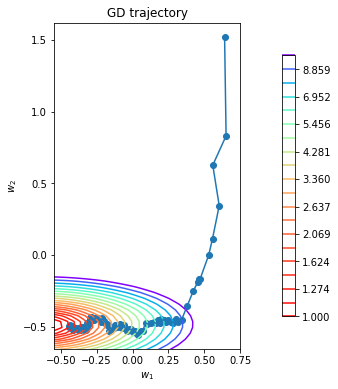

learning_rate = 0.001
batch_size = 8


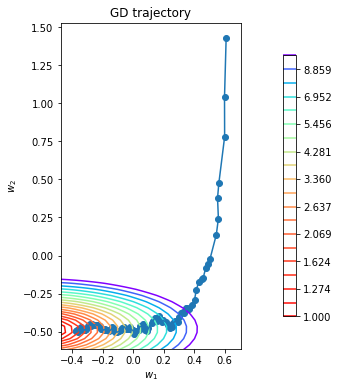

learning_rate = 0.001
batch_size = 16


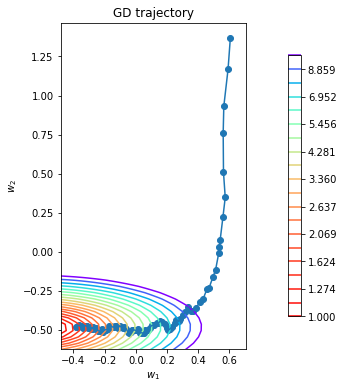

learning_rate = 0.005
batch_size = 2


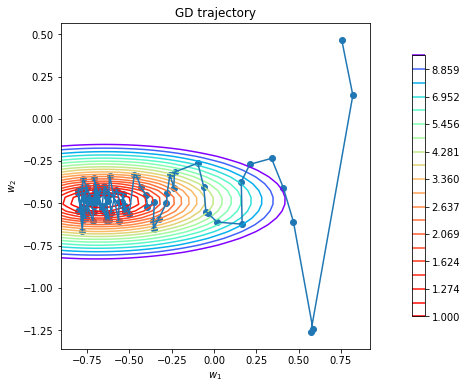

learning_rate = 0.005
batch_size = 4


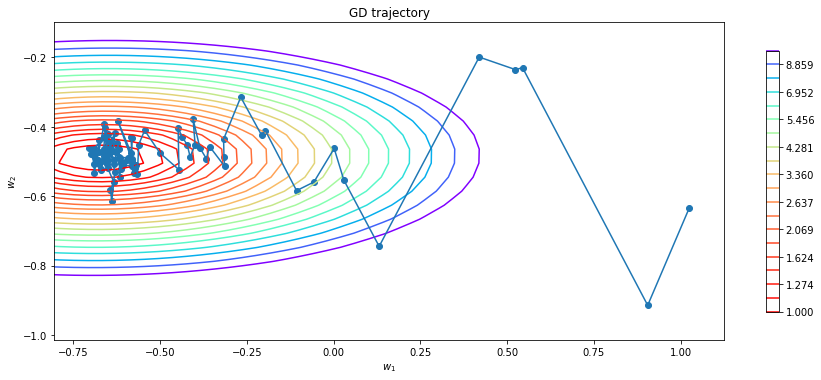

learning_rate = 0.005
batch_size = 8


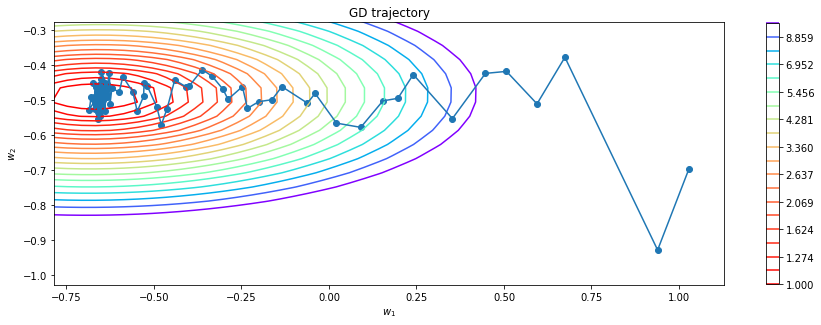

learning_rate = 0.005
batch_size = 16


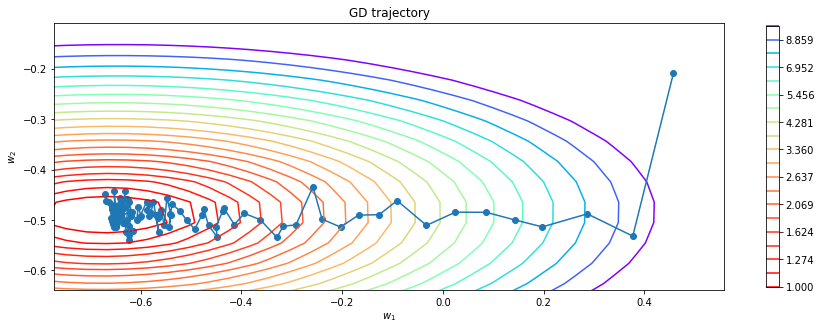

learning_rate = 0.01
batch_size = 2


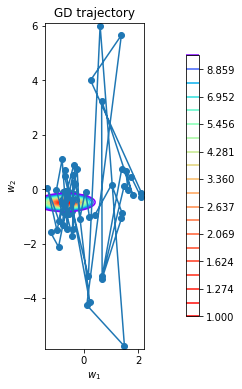

learning_rate = 0.01
batch_size = 4


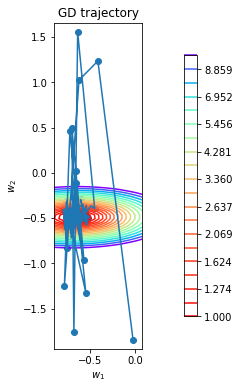

learning_rate = 0.01
batch_size = 8


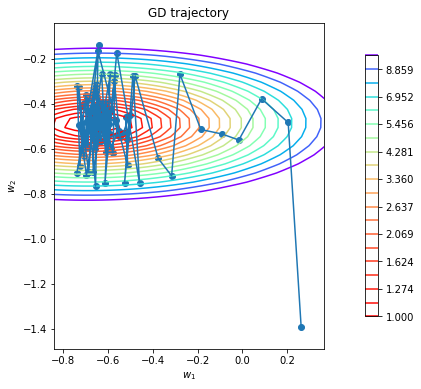

learning_rate = 0.01
batch_size = 16


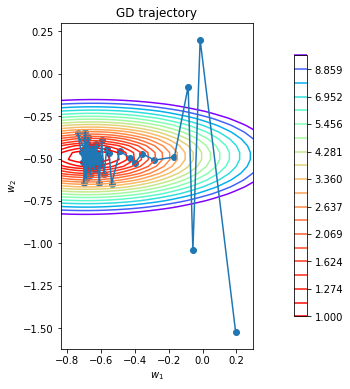

learning_rate = 0.1
batch_size = 2


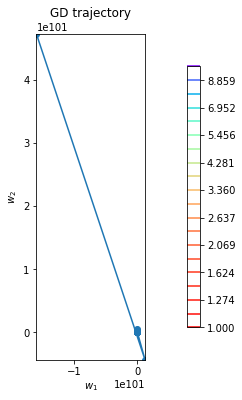

learning_rate = 0.1
batch_size = 4


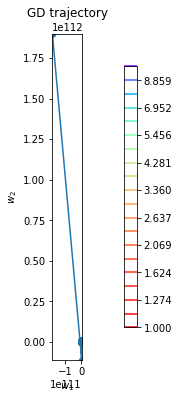

learning_rate = 0.1
batch_size = 8


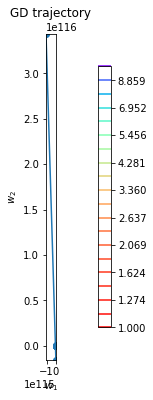

learning_rate = 0.1
batch_size = 16


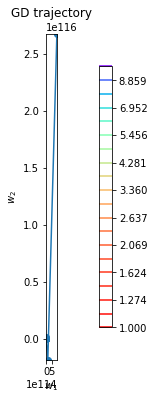

In [12]:
lrs = [0.0005, 0.001, 0.005, 0.01, 0.1]
batch_sizes = [2, 4, 8, 16]
for lr in lrs:
    for batch_size in batch_sizes:
        print(f'learning_rate = {lr}')
        print(f'batch_size = {batch_size}')
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100), X, y, loss)

При малых значениях lr видно, что чем больше batch_size, тем ровнее сходимость. Также отметим, что sgd много колеблится около минимума, перескакивая через него...(чем больше lr, тем хуже)

In [13]:
# -- YOUR CODE HERE --

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    s0 = 1
    trajectory = []
    w = w_init.copy()
    for t in range(n_iterations):
        n_t = lr * (s0 / (s0 + t)) ** p
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w -= n_t * loss.calc_grad(X[batch_indices], y[batch_indices], w)
        trajectory.append(w.copy())
    return trajectory

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


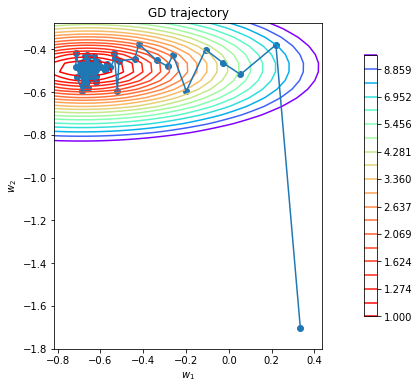

p = 0.325


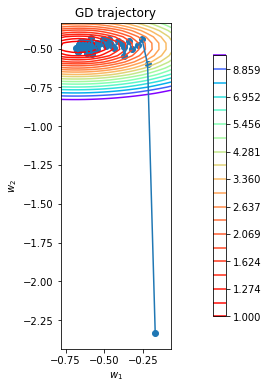

p = 0.55


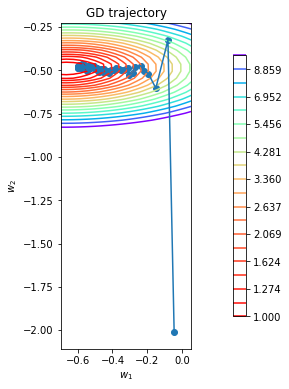

p = 0.775


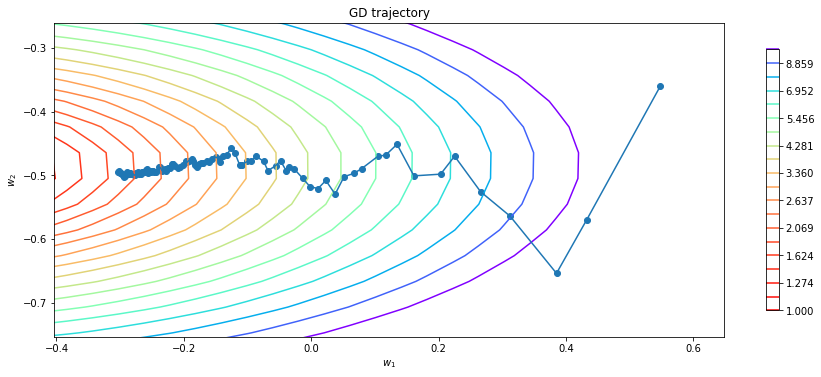

p = 1.0


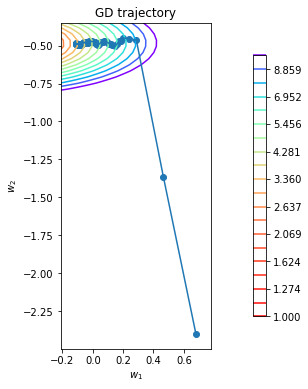

In [15]:
p_values = np.linspace(0.1, 1, 5)
batch_size = 10
lr = 0.01
for p in p_values:
    print(f'p = {p}')
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 100), X, y, loss)

In [16]:
0.5 ** 0.1

0.9330329915368074

In [17]:
0.5 ** 0.5

0.7071067811865476

По скольку в дробь всегда получается меньше 1 + значения p меньше 1 => при увеличении p значения дроби будут уменьшаться. Это видно на графиках, чем больше p, тем ровнее траектория

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

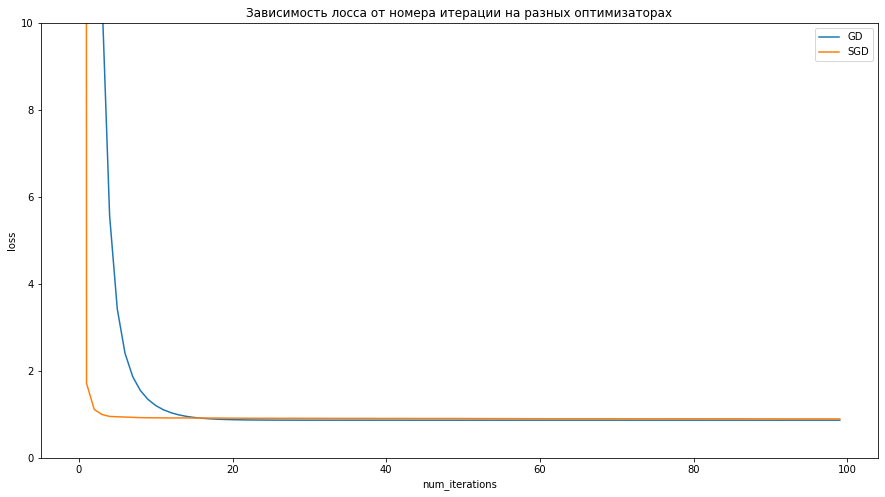

In [20]:
batch_size = 10
n_iterations = 100
w_list_gd = gradient_descent(w_init, X, y, loss, lr=0.01, n_iterations=n_iterations)
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=batch_size, p=1, n_iterations=n_iterations)

losses_gd = [loss.calc_loss(X, y, w) for w in w_list_gd]
losses_sgd = [loss.calc_loss(X, y, w) for w in w_list_sgd]

plt.figure(figsize=(15, 8))
plt.ylim((0, 10))
plt.title("Зависимость лосса от номера итерации на разных оптимизаторах")
plt.plot(np.arange(n_iterations), losses_gd, label='GD')
plt.plot(np.arange(n_iterations), losses_sgd, label='SGD')
plt.xlabel("num_iterations")
plt.ylabel("loss")
plt.legend();

Как видим sgd побыстрее сходится(повезло просто:3), но больше тут ничего не увидим. Так как главное преимущество sgd в том, что мы экономим ресурсы считая градиент не по всей выборке, а по подвыборкам. Время в этом графике никак не учитывается

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [37]:
from sklearn.base import BaseEstimator

class LinearRegression(BaseEstimator):
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray, n_iterations=1000) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init= np.random.uniform(-1, 1, (X.shape[1]))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [12]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [13]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

##### Уберем наны

In [14]:
X_raw.shape

(201, 27)

In [15]:
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
X_raw.drop(columns='index', inplace=True)

In [17]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       164 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       199 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      197 non-null    float64
 19  19      197 non-null    float64
 20  20      201 non-null    float64
 21  21      199 non-null    float64
 22  22

In [18]:
X_raw.isna().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
25     0
dtype: int64

<Axes: >

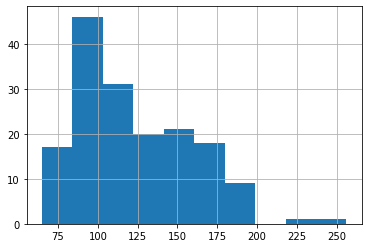

In [19]:
X_raw[1].hist()

поменяем на средние

In [20]:
X_raw[1] = X_raw[1].fillna(X_raw[1].mean())

In [21]:
X_raw[1].isna().sum()

0

Остальных нанов оч, мало => можно удалить, сильно ничего не испортив

In [22]:
X_raw.dropna(inplace=True)
X_raw.shape

(193, 26)

In [23]:
X_raw.isna().sum() # избавились от нанов

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [24]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

##### Кодируем категориальные

In [25]:
cat_features = X_raw.columns[X_raw.dtypes == 'object']
X_raw[cat_features].head()

,2,3,4,5,6,7,8,14,15,17
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [26]:
num_features = list(set(X_raw.columns) - set(cat_features))

In [27]:
X_raw[num_features]

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [28]:
dummies = pd.get_dummies(X_raw[cat_features], drop_first=True)
dummies.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_four,15_six,15_three,15_twelve,17_2bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
X_raw = pd.concat([X_raw[num_features], dummies], axis=1)
X_raw.head()

,0,1,9,10,11,12,13,16,18,19,...,15_four,15_six,15_three,15_twelve,17_2bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


##### Делим на train/test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=10)

##### Нормализуем числовые

In [32]:
X_train.head()

,0,1,9,10,11,12,13,16,18,19,...,15_four,15_six,15_three,15_twelve,17_2bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
27,-1,110.0,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,1,0,0,0,1,0,0,0,0,0
47,1,104.0,93.1,159.1,64.2,54.1,1890,91,3.03,3.15,...,1,0,0,0,1,0,0,0,0,0
176,-1,90.0,104.5,187.8,66.5,54.1,3131,171,3.27,3.35,...,0,1,0,0,0,0,0,1,0,0
200,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,...,1,0,0,0,0,0,0,1,0,0
67,-1,93.0,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,...,0,0,0,0,0,1,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [34]:
X_train.head()

,0,1,9,10,11,12,13,16,18,19,...,15_four,15_six,15_three,15_twelve,17_2bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
27,-1.448054,-0.344840,0.676451,0.025908,-0.570919,2.459761,-0.038288,-0.140079,0.074814,0.643144,...,1,0,0,0,1,0,0,0,0,0
47,0.179686,-0.528278,-0.957768,-1.165682,-0.754951,0.059341,-1.234250,-0.849236,-1.073616,-0.327570,...,1,0,0,0,1,0,0,0,0,0
176,-1.448054,-0.956300,0.868712,1.040683,0.303235,0.059341,1.066818,0.980848,-0.184509,0.298697,...,0,1,0,0,0,0,0,1,0,0
200,-1.448054,-0.803435,1.605712,1.117560,1.407429,0.648917,0.938878,0.294566,1.704843,-0.327570,...,1,0,0,0,0,0,0,1,0,0
67,-1.448054,-0.864581,2.647126,2.178460,2.695656,0.985818,2.251654,1.255360,0.963921,1.206785,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# -- YOUR CODE HERE --

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [38]:
model_1 = LinearRegression(MSELoss()).fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model_1.predict(X_test))

5503890.575886516

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [40]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.sum(np.square(X.dot(w) - y)) / X.shape[0] + self.coef * np.sum(np.square(w[:-1])) 

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        grad = 2 * np.dot(X.T, X.dot(w) - y) / X.shape[0] + 2 * self.coef * w
        grad[-1] = 0
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [42]:
from tqdm.notebook import tqdm

In [55]:
coeffs = np.linspace(0.00001, 0.005, 5)
scores = []
for coeff in tqdm(coeffs):
    model_l2 = LinearRegression(MSEL2Loss(coeff)).fit(X_train, y_train)
    scores.append(mean_squared_error(y_test, model_l2.predict(X_test)))

  0%|          | 0/5 [00:00<?, ?it/s]

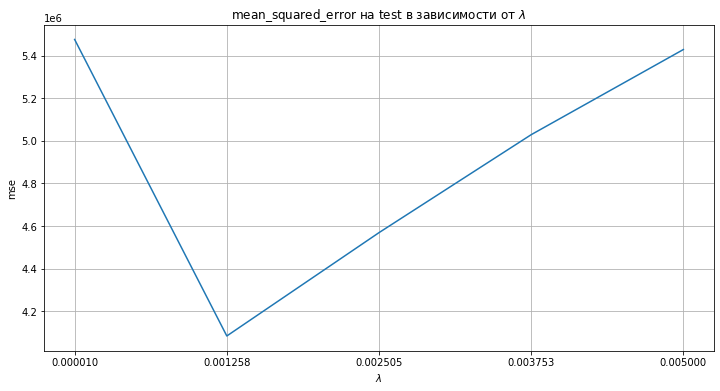

In [56]:
plt.figure(figsize=(12, 6))
plt.title(r"mean_squared_error на test в зависимости от $\lambda$")
plt.xlabel(r'$\lambda$')
plt.ylabel('mse')
plt.xticks(coeffs)
plt.grid()
plt.plot(coeffs, scores)

In [57]:
model_l2 = LinearRegression(MSEL2Loss(0.001258)).fit(X_train, y_train)
model_1 = LinearRegression(MSELoss()).fit(X_train, y_train)

print(f'mse simple linreg: {mean_squared_error(y_test, model_1.predict(X_test))}')
print(f'mse linreg with l2: {mean_squared_error(y_test, model_l2.predict(X_test))}')

mse simple linreg: 5503869.258622176
mse linreg with l2: 4084068.522128469


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [87]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float = 1.) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        z = X.dot(w) - y
        phi = np.vectorize(lambda x: np.square(x) / 2 if -self.eps < x < self.eps else self.eps(np.abs(x) - self.eps / 2))
        return np.mean(phi(z))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        nabla_phi = np.vectorize(lambda x: x if -self.eps < x < self.eps else self.eps * np.sign(x))
        z = X.dot(w) - y
        return np.mean(X * nabla_phi(z).reshape(-1, 1), axis=0)
        

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [90]:
mean_squared_error(y_test, model_huber.predict(X_test))

5170788.96386294

  0%|          | 0/10 [00:00<?, ?it/s]

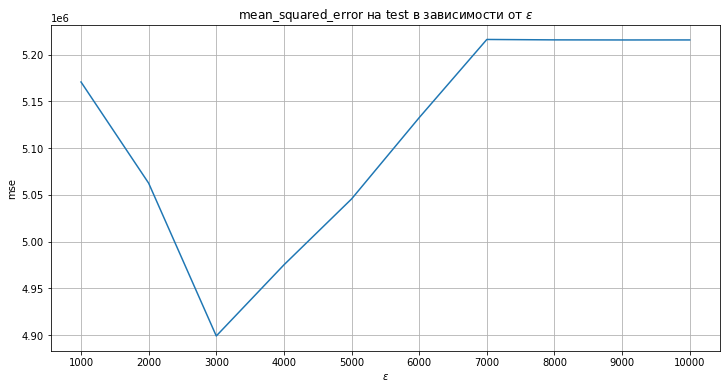

In [92]:
coeffs = np.arange(1e3, 1e4 + 1, 1e3)
scores = []
for coeff in tqdm(coeffs):
    model_huber = LinearRegression(HuberLoss(coeff)).fit(X_train, y_train)
    scores.append(mean_squared_error(y_test, model_huber.predict(X_test)))
    
plt.figure(figsize=(12, 6))
plt.title(r"mean_squared_error на test в зависимости от $\epsilon$")
plt.xlabel(r'$\epsilon$')
plt.ylabel('mse')
plt.xticks(coeffs)
plt.grid()
plt.plot(coeffs, scores)

In [93]:
model_huber = LinearRegression(HuberLoss(3000)).fit(X_train, y_train)
model_1 = LinearRegression(MSELoss()).fit(X_train, y_train)

print(f'mse simple linreg: {mean_squared_error(y_test, model_1.predict(X_test))}')
print(f'mse linreg with huber_loss: {mean_squared_error(y_test, model_huber.predict(X_test))}')

mse simple linreg: 5503834.585787942
mse linreg with huber_loss: 4898825.572243671


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

NEVER GIVE UP!!!

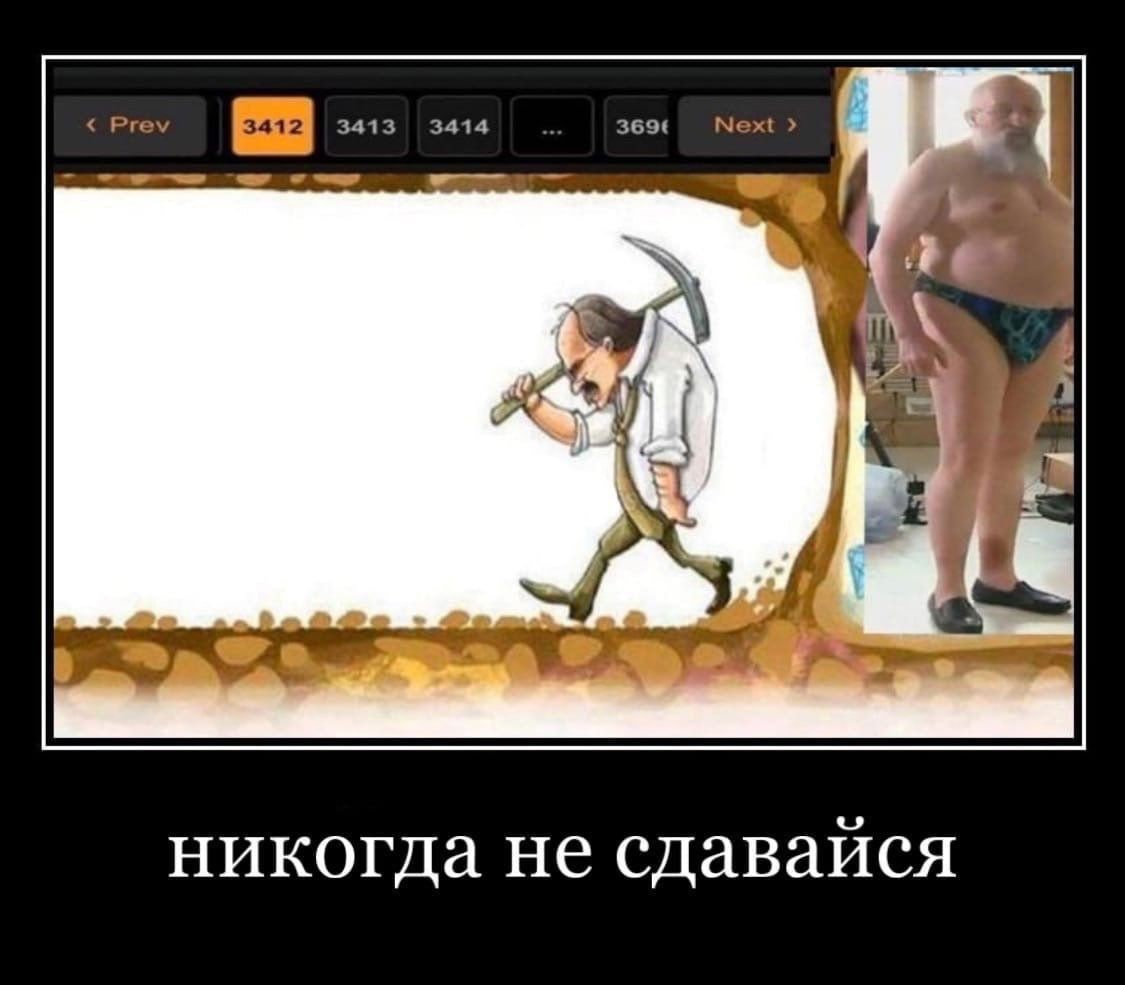

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE --